In [194]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import rsatoolbox
from rsatoolbox.data import Dataset
from rsatoolbox.rdm.calc import calc_rdm
import matplotlib.pyplot as plt
import os
from collections import namedtuple
from pathlib import Path

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [195]:
# path for c elegans data and directory for where activation data is stored by layer (.npy format)
neuron_data_path = "/Users/charleszhang/Neuromatch_2024/MetaMorph/data.xls"
activation_data_path = "../Pretrained_MLP"

In [200]:
# for a given folder containing npy files, iterate over files and load rdms for each layer
# crops based on argument
Rdm = namedtuple('rdm', ['rdm', 'name'])
def get_model_rdms(path: str, crop: int = 1000):
    rdms = []
    
    for file in os.listdir(path):
        if file.endswith(".npy"):
            dataset= rsatoolbox.data.Dataset(np.load(Path(path) / file)[:crop].squeeze())
            rdms.append(Rdm(rsatoolbox.rdm.calc_rdm(dataset), file.split("/")[-1]))
        
    return rdms

In [201]:
# read c elegans data
worm1_data = pd.read_excel(neuron_data_path, 'Worm1')
worm2_data = pd.read_excel(neuron_data_path, 'Worm2')
worm3_data = pd.read_excel(neuron_data_path, 'Worm3')
worm4_data = pd.read_excel(neuron_data_path, 'Worm4')

In [202]:
crop = 500
# (sample, neural dims)
# filter for forward behavior samples and crop shapes
worm1_rsadata = rsatoolbox.data.Dataset(worm1_data.query('behavior == 1').iloc[:, 4:60].dropna().iloc[:crop,:].to_numpy())
worm1_rdm = rsatoolbox.rdm.calc_rdm(worm1_rsadata, descriptor=None, noise=None)

worm2_rsadata = rsatoolbox.data.Dataset(worm2_data.query('behavior == 1').iloc[:, 4:60].dropna().iloc[:crop,:].to_numpy())
worm2_rdm = rsatoolbox.rdm.calc_rdm(worm2_rsadata,descriptor=None, noise=None)

worm3_rsadata = rsatoolbox.data.Dataset(worm3_data.query('behavior == 1').iloc[:, 4:60].dropna().iloc[:crop,:].to_numpy())
worm3_rdm = rsatoolbox.rdm.calc_rdm(worm3_rsadata, descriptor=None, noise=None)

worm4_rsadata = rsatoolbox.data.Dataset(worm4_data.query('behavior == 1').iloc[:, 4:60].dropna().iloc[:crop,:].to_numpy())
worm4_rdm = rsatoolbox.rdm.calc_rdm(worm4_rsadata, descriptor=None, noise=None)

worm_rdms = rsatoolbox.rdm.concat([worm1_rdm, worm2_rdm, worm4_rdm])


/Users/charleszhang/miniforge3/envs/neuromatch/lib/python3.9/site-packages/rsatoolbox/vis/model_plot.py:576: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



(<Figure size 1250x1000 with 2 Axes>,
 <Axes: >,
 <Axes: title={'center': 'Pretrained MLP with default environment'}>)

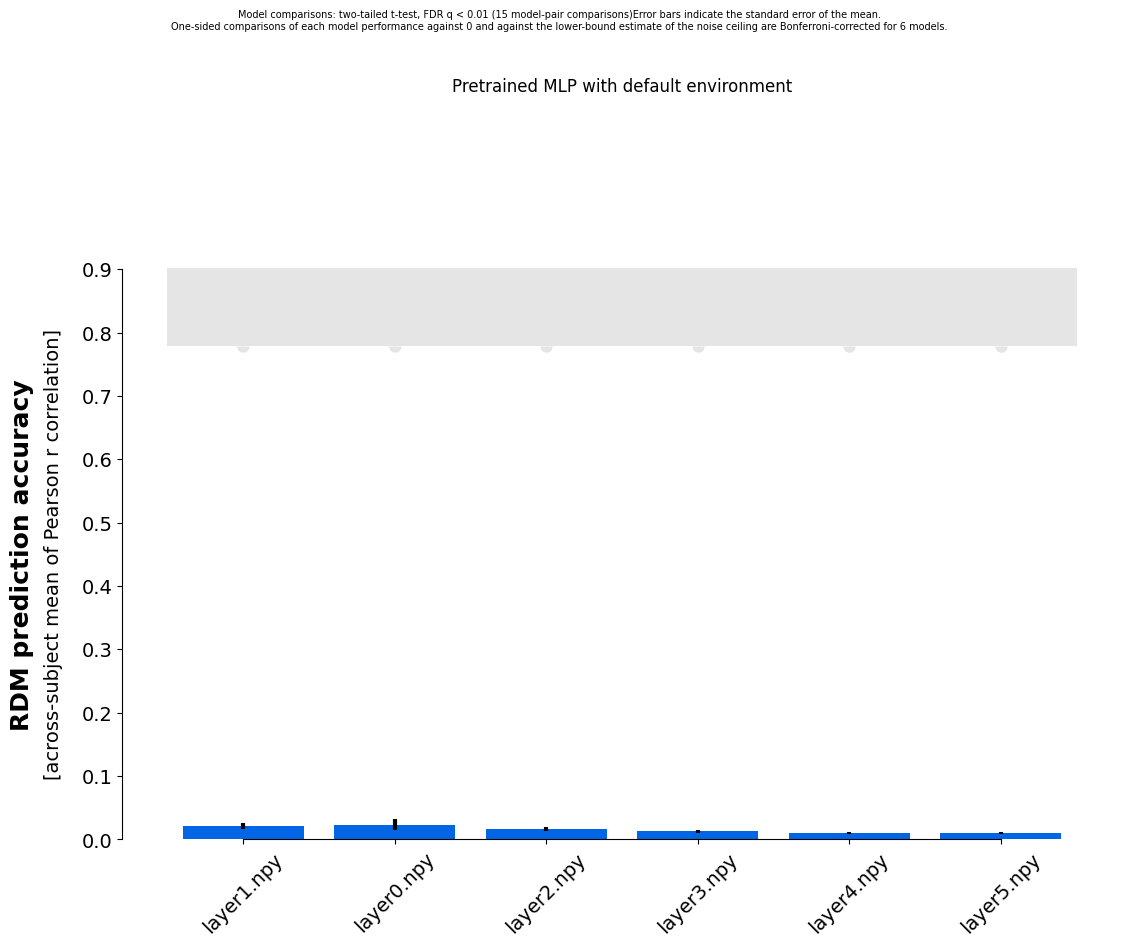

In [207]:
# RSA and plotting. Title not included
rdms_with_name = get_model_rdms(activation_data_path, crop=crop)
models_to_compare = [rsatoolbox.model.ModelFixed(rdm=r.rdm, name=r.name) for r in rdms_with_name]

method = 'corr'
results =  rsatoolbox.inference.evaluate.eval_fixed(models_to_compare, worm_rdms, method=method) 
rsatoolbox.vis.plot_model_comparison(results)
